In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [213]:
# Load dataset (replace 'file_path' with the actual path)
data = pd.read_csv('C:/EmotionRecog/artifact/raw.csv')

In [214]:
data.columns.to_list()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Departments',
 'salary']

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [216]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

In [217]:
attrition_counts = data['left'].value_counts()
attrition_percentages = (attrition_counts / len(data)) * 100
print(attrition_counts)
print(attrition_percentages)

left
0    11428
1     3571
Name: count, dtype: int64
left
0    76.191746
1    23.808254
Name: count, dtype: float64


In [194]:
# Standard hours and Employeecount is same for all instances 
#data.drop(columns=['EMPLOYEECOUNT','STANDARDHOURS','OVER18','EMPLOYEENUMBER'],axis=1, inplace=True)

In [228]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [218]:
num_attr=[attr for attr in data.columns if data[attr].dtype!='O']
cat_attr=[attr for attr in data.columns if data[attr].dtype=='O']

print(f"Numerical Attributes:{num_attr}")
print(f"Categorical Attributes:{cat_attr}")

Numerical Attributes:['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']
Categorical Attributes:['Departments', 'salary']


In [197]:
# label_enc = LabelEncoder()
# data['GENDER'] = label_enc.fit_transform(data['GENDER'])
# data = pd.get_dummies(data, columns=['BUSINESSTRAVEL', 'DEPARTMENT', 'EDUCATIONFIELD', 'JOBROLE', 'MARITALSTATUS', 'OVERTIME'])

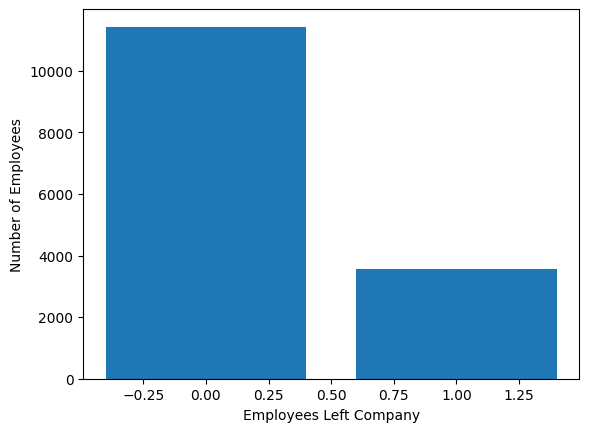

In [225]:
left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()


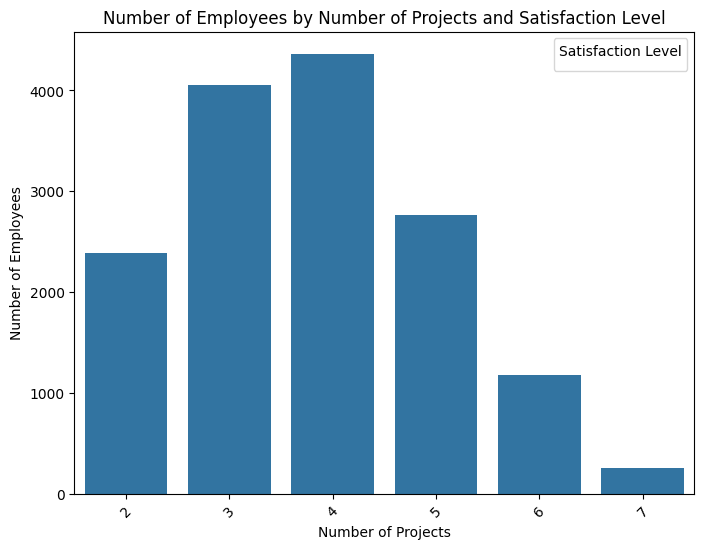

In [234]:
# Group by number of projects and count employees
num_projects = data.groupby('number_project')['satisfaction_level'].count()

# Create a bar chart using Seaborn
plt.figure(figsize=(8, 6))  # Optional: adjust figure size
sns.barplot(x=num_projects.index, y=num_projects.values, data=num_projects.to_frame())

# Customize the plot (optional)
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.title('Number of Employees by Number of Projects and Satisfaction Level')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Satisfaction Level')  # Add legend title

plt.show()

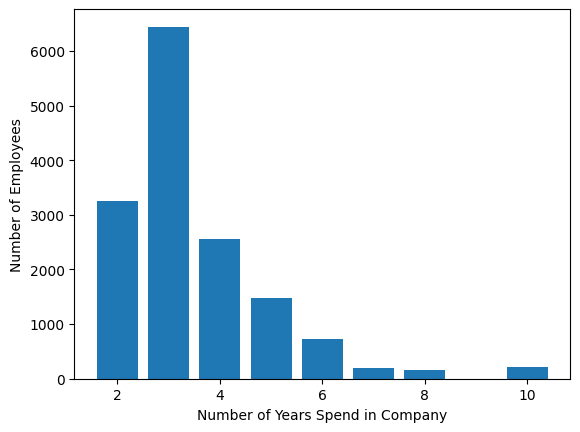

In [235]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()


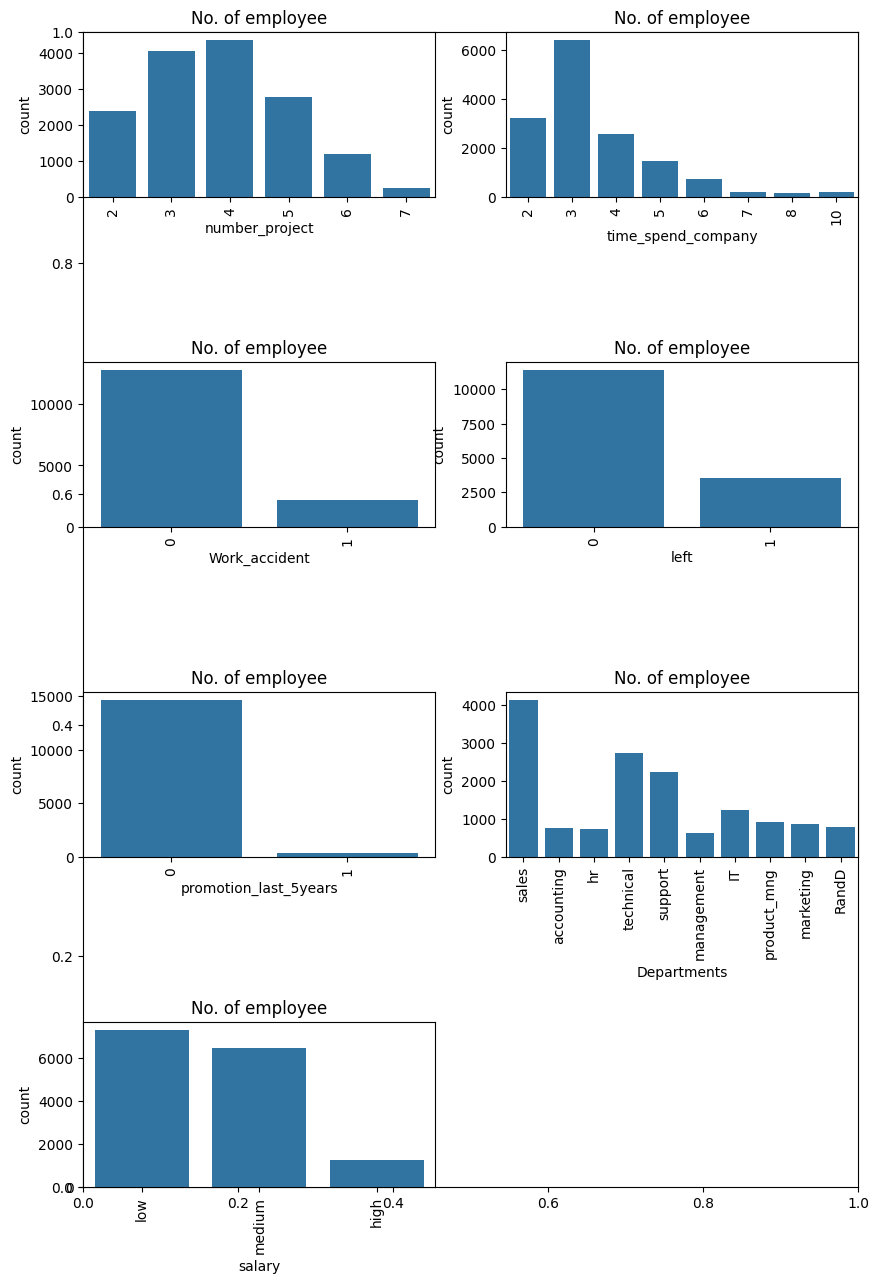

In [238]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data)
    plt.xticks(rotation=90)
    plt.title("No. of employee")


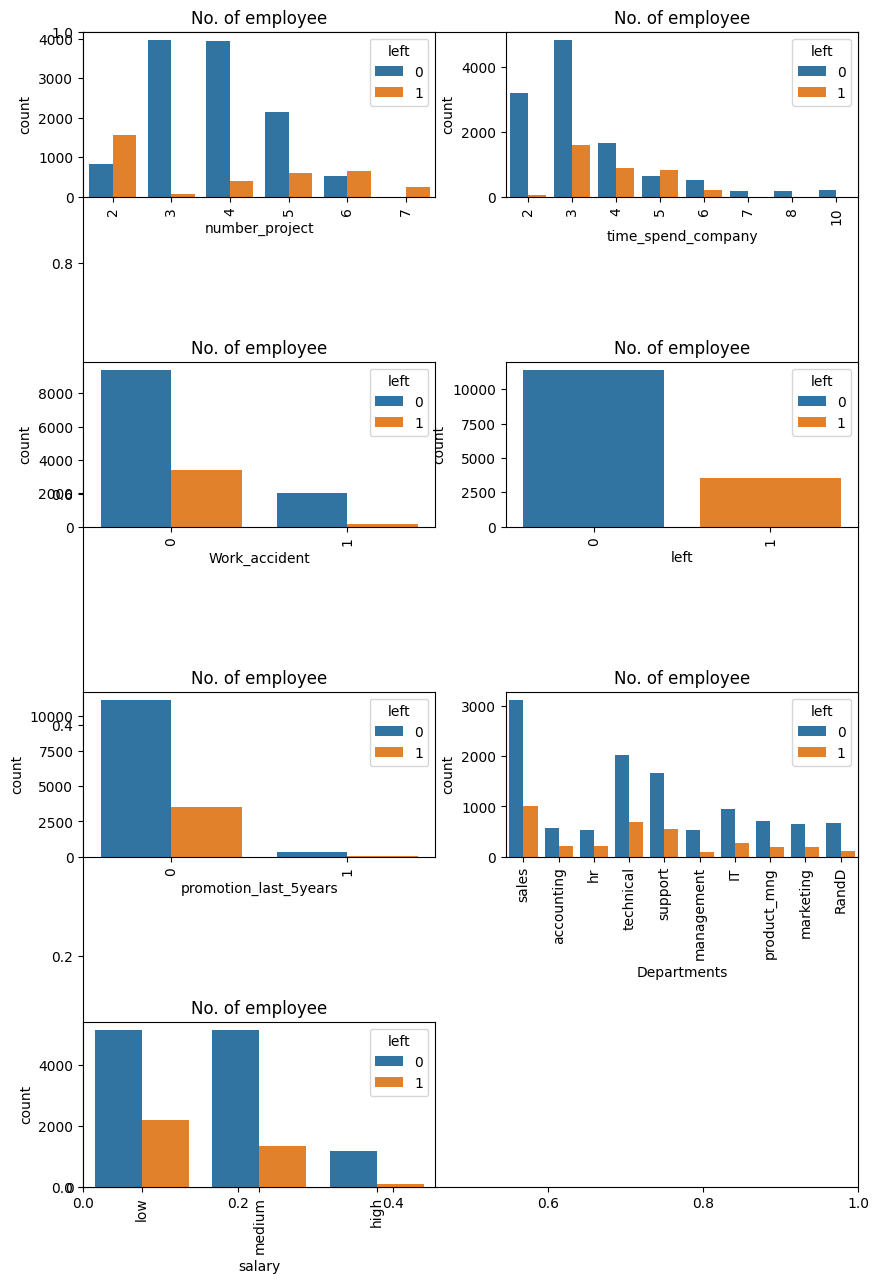

In [239]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = data, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")


In [244]:
from sklearn import preprocessing

In [259]:
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments']=le.fit_transform(data['Departments'])

In [260]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['average_montly_hours', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)


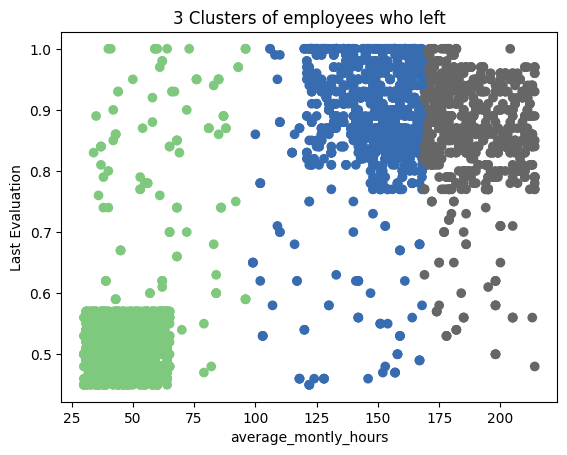

In [263]:
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['average_montly_hours'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('average_montly_hours')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()


In [219]:
data.to_csv("NewRAw.csv", index=False)

In [203]:
data['ATTRITION'].nunique()

2

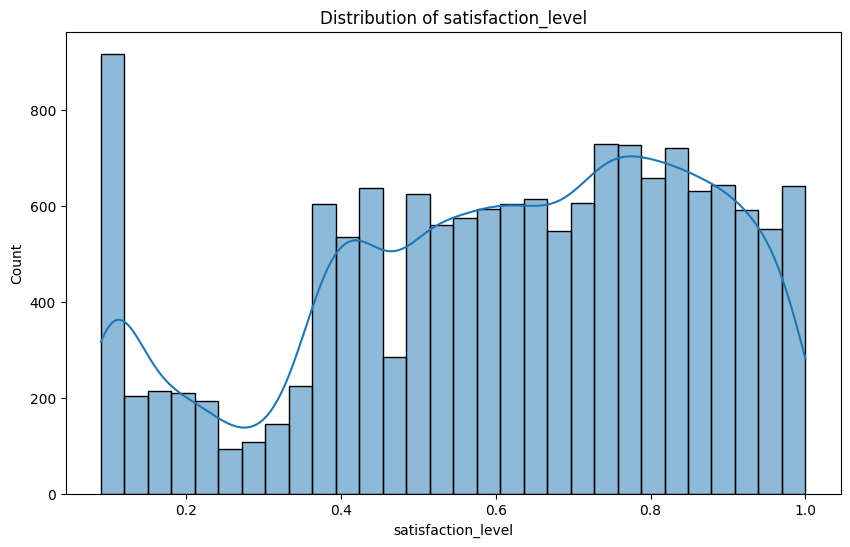

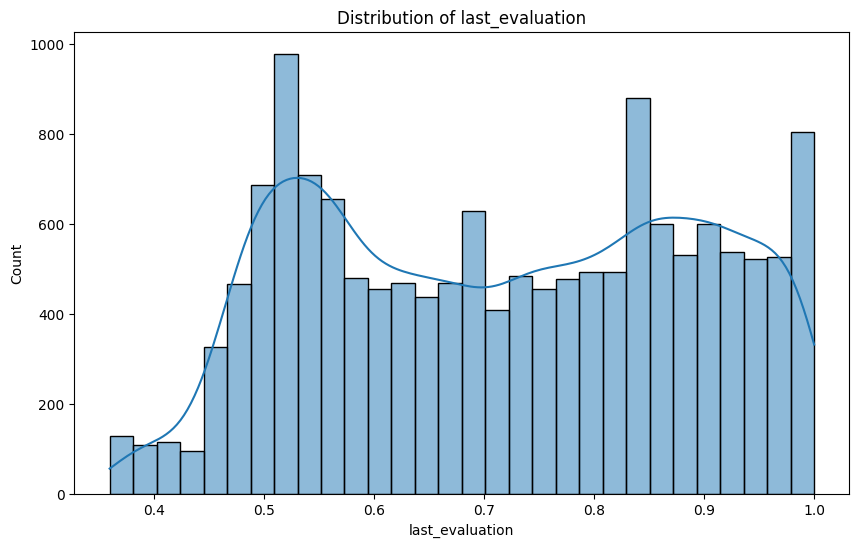

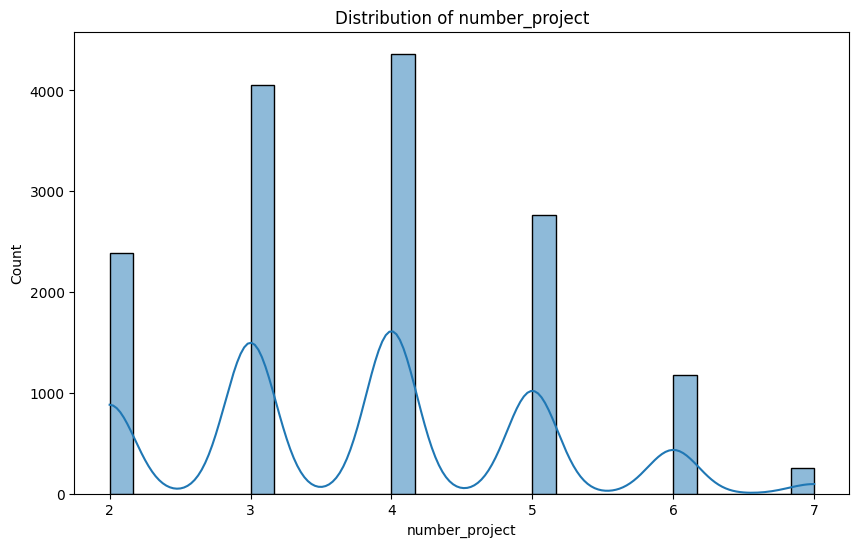

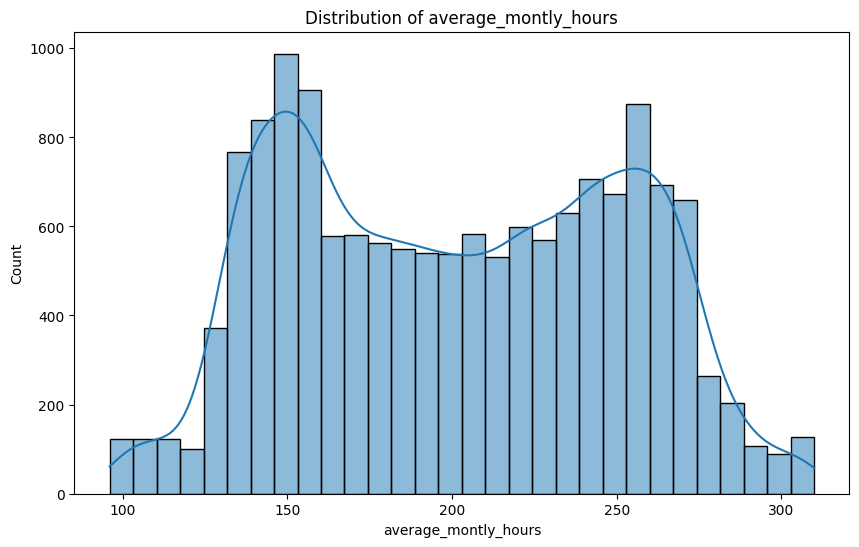

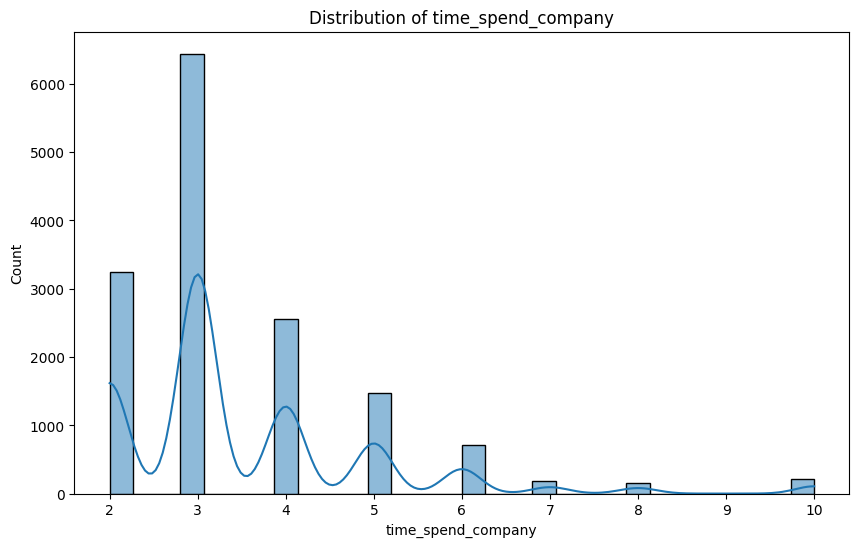

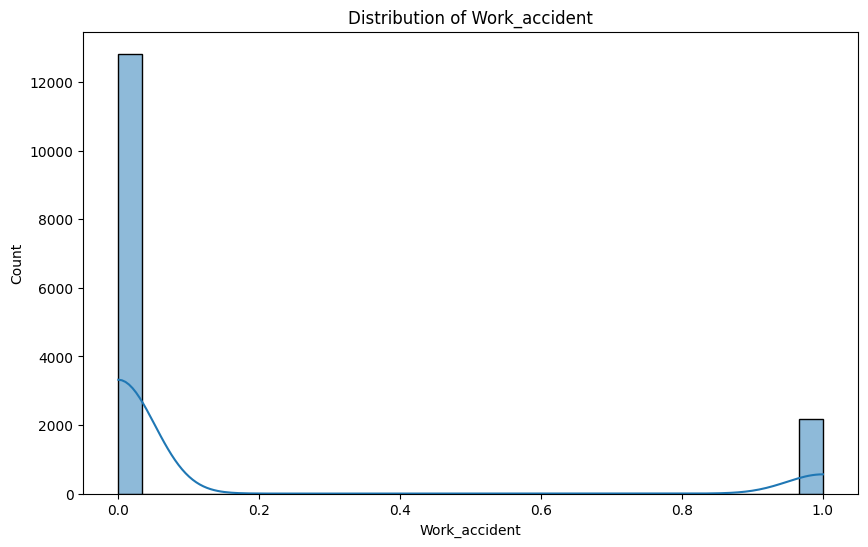

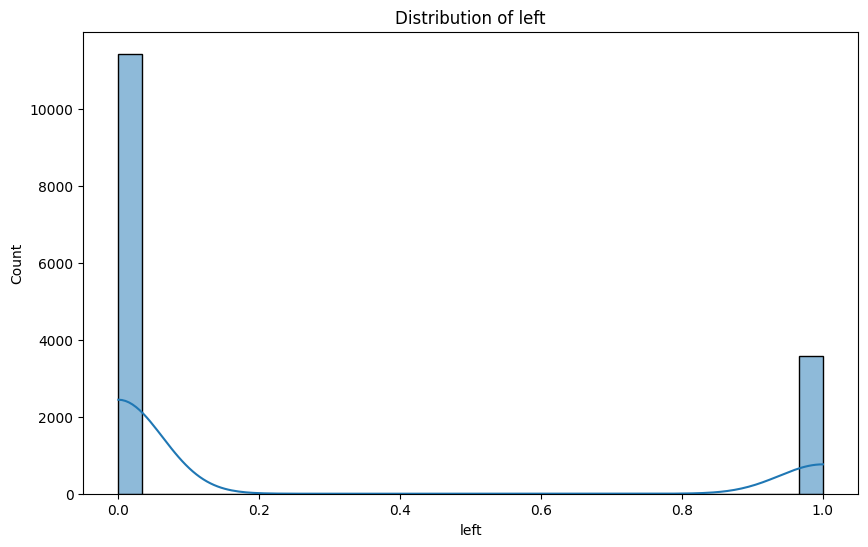

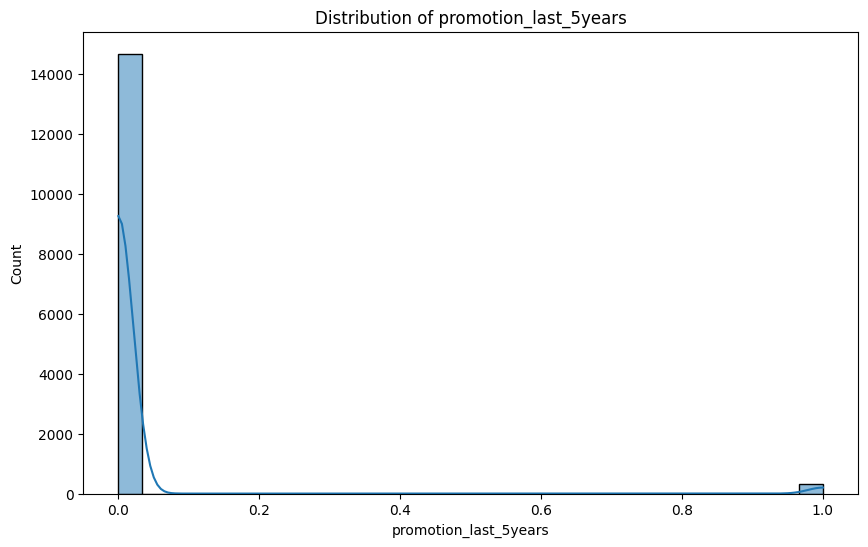

In [221]:
# Univariate analysis
for num in num_attr:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[num], bins=30,kde=True)
    plt.title(f'Distribution of {num}')
plt.show()

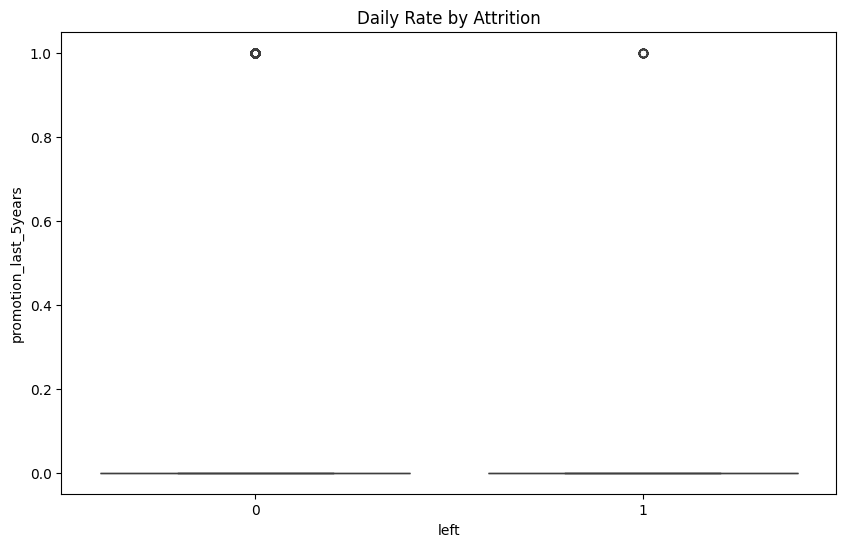

In [222]:
# # Bivariate analysis: Box plot for numerical variable by attrition
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='left', y='promotion_last_5years', data=data)
# plt.title('Daily Rate by Attrition')
# plt.show()

Selected Features: Index(['AGE', 'DAILYRATE', 'DISTANCEFROMHOME', 'EDUCATION',
       'ENVIRONMENTSATISFACTION', 'HOURLYRATE', 'JOBINVOLVEMENT', 'JOBLEVEL',
       'JOBSATISFACTION', 'MONTHLYINCOME', 'MONTHLYRATE', 'NUMCOMPANIESWORKED',
       'PERCENTSALARYHIKE', 'RELATIONSHIPSATISFACTION', 'STOCKOPTIONLEVEL',
       'TOTALWORKINGYEARS', 'TRAININGTIMESLASTYEAR', 'WORKLIFEBALANCE',
       'YEARSATCOMPANY', 'YEARSINCURRENTROLE', 'YEARSSINCELASTPROMOTION',
       'YEARSWITHCURRMANAGER', 'OVERTIME_No', 'OVERTIME_Yes',
       'MARITALSTATUS_Single'],
      dtype='object')
